In [2]:
#-------Import Dependencies-------#
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import os


In [3]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc



In [4]:
from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
#from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
from scipy.ndimage import imread


In [5]:
import tensorflow.keras 


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
#import keras
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger

Using TensorFlow backend.


In [6]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [7]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [10]:
#prefix = '/Users/Mingming Lang/Downloads/stanford-dogs-dataset/Images/'
# os.path.join(prefix,'n02085620-Chihuahua')

chihuahua_dir = '../input/images/Images/n02085620-Chihuahua'
japanese_spaniel_dir = '../input/images/Images/n02085782-Japanese_spaniel'



maltese_dir = '../input/images/Images/n02085936-Maltese_dog'
pekinese_dir = '../input/images/Images/n02086079-Pekinese'
shitzu_dir = '../input/images/Images/n02086240-Shih-Tzu'
blenheim_spaniel_dir = '../input/images/Images/n02086646-Blenheim_spaniel'
papillon_dir = '../input/images/Images/n02086910-papillon'
toy_terrier_dir = '../input/images/Images/n02087046-toy_terrier'
afghan_hound_dir = '../input/images/Images/n02088094-Afghan_hound'
basset_dir = '../input/images/Images/n02088238-basset'


X = []
Z = []
imgsize = 150

In [11]:
training_data('chihuahua',chihuahua_dir)
training_data('japanese_spaniel',japanese_spaniel_dir)
training_data('maltese',maltese_dir)
training_data('pekinese',pekinese_dir)
training_data('shitzu',shitzu_dir)
training_data('blenheim_spaniel',blenheim_spaniel_dir)
training_data('papillon',papillon_dir)
training_data('toy_terrier',toy_terrier_dir)
training_data('afghan_hound',afghan_hound_dir)
training_data('basset',basset_dir)

100%|██████████| 175/175 [00:01<00:00, 137.97it/s]


In [12]:
from keras.utils.np_utils import to_categorical
# from keras.applications.vgg16 import VGG16,preprocess_input

label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,10)
X = np.array(X)

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input 

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

X = np.array(X, dtype=np.float64)
X = preprocess_input(X)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=69)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

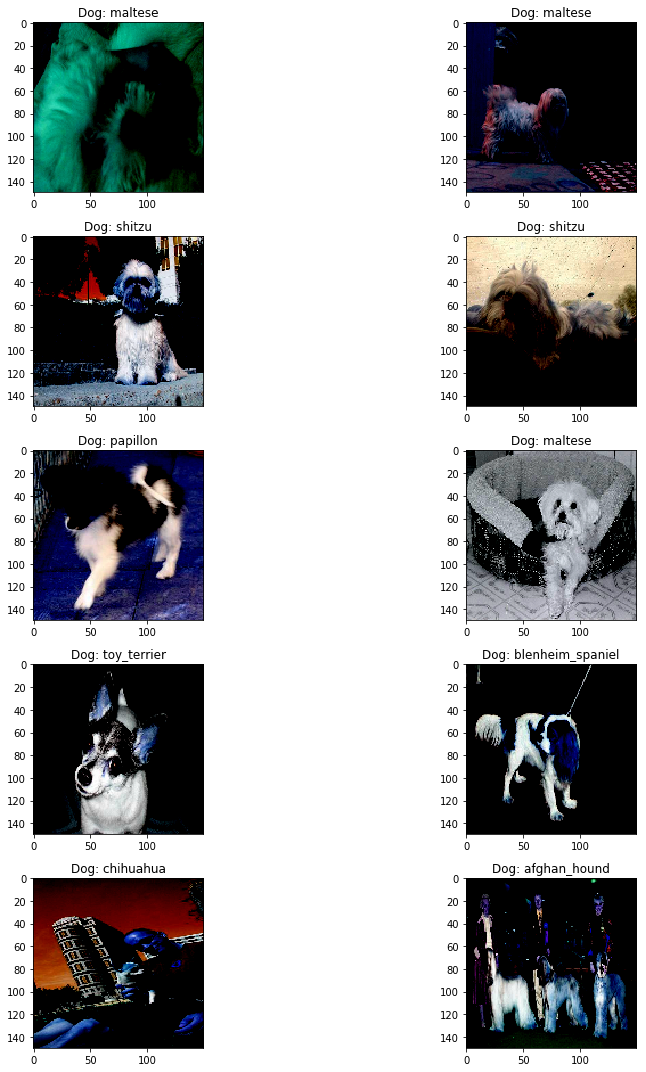

In [14]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])
        
plt.tight_layout()

In [15]:
from keras.utils.vis_utils import plot_model

# base_model = VGG16(include_top=False,
#                   input_shape = (imgsize,imgsize,3),
#                   weights = 'imagenet')

base_model = InceptionV3(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                   weights = 'imagenet')

#include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

    
from keras.models import Sequential

model = Sequential()
model.add(base_model)

#from keras.layers import InputLayer

model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)


Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7ffa41a58cf8> False
<keras.layers.convolutional.Conv2D object at 0x7ffa41a58208> False
<keras.layers.normalization.BatchNormalization object at 0x7ffa41a58e10> False
<keras.layers.core.Activation object at 0x7ffa41ae55c0> False
<keras.layers.convolutional.Conv2D object at 0x7ffa401f06d8> False
<keras.layers.normalization.BatchNormalization object at 0x7ffa40143f60> False
<keras.layers.core.Activation object at 0x7ffa4015f208> False
<keras.layers.convolutional.Conv2D object at 0x7ffa4018bf60> False
<keras.layers.normalization.BatchNormalization object at 0x7ffa40097ba8> False
<keras.layers.core.Activation object at 0x7ffa4005a0b8> False
<keras.layers.pooling.MaxPooling2D object at 0x7ffa346f9fd0> False
<keras.layers.convolutional.Conv2D object at 0x7ffa347ad7f0> False
<keras.layers.normalization.BatchNor

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 21,823,274
Trainable params: 20,490
Non-trainable params: 21,802,784
_________________________________________________________________


In [17]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger, ReduceLROnPlateau,LearningRateScheduler

checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]


In [18]:
#-----------Optimizers-----------#
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-2)
#----------Compile---------------#
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
#-----------Training------------#
history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=16),
    validation_data  = (x_test,y_test),
    validation_steps = 1000,
    steps_per_epoch  = 1000,
    epochs = 30, 
    verbose = 1,
    callbacks=callbacks
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
1000/1000 [==============================] - 79s 79ms/step - loss: 1.7735 - acc: 0.3992 - val_loss: 2.5040 - val_acc: 0.6274

Epoch 00001: val_loss improved from inf to 2.50402, saving model to ./base.model
Epoch 2/30
1000/1000 [==============================] - 76s 76ms/step - loss: 1.5298 - acc: 0.4914 - val_loss: 2.3744 - val_acc: 0.6776

Epoch 00002: val_loss improved from 2.50402 to 2.37435, saving model to ./base.model
Epoch 3/30
1000/1000 [==============================] - 75s 75ms/step - loss: 1.4911 - acc: 0.5061 - val_loss: 2.6815 - val_acc: 0.6586

Epoch 00003: val_loss did not improve from 2.37435
Epoch 4/30
1000/1000 [==============================] - 76s 76ms/step - loss: 1.4677 - acc: 0.5149 - val_loss: 2.8412 - val_acc: 0.6395

Epoch 00004: val_loss did not improve from 2.37435
Epoch 5/30
1000/1000 [==============================] - 75s 75ms/step - loss: 1.4574 - acc: 0.5226 - val_loss: 3.0725 - val_acc: 0.6101


577/577 [==============================] - 1s 2ms/step
Model Test Loss: 2.144970796963582
Model Test Accuracy: 0.7001733102253033
Weights Saved


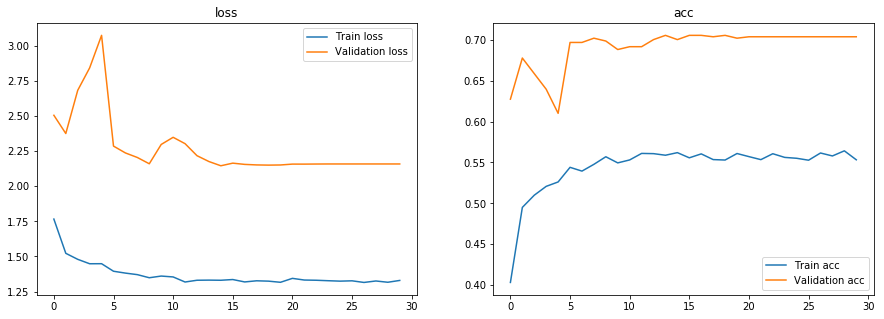

In [19]:
show_final_history(history)
model.load_weights('./base.model')
model_score = model.evaluate(x_test,y_test)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")